In [1]:
import glob
import pandas as pd

In [2]:
#importlib code just for debugging : to allow changes in scripts we are imporing from
#reflect here. It can be removed if you are not making changes to the scripts we are imporing from

import importlib ##can remove
import graphing_config as GC
import or_common as orc
importlib.reload(GC) ##can remove
importlib.reload(orc) ##can remove

<module 'or_common' from '/gpfs/gibbs/pi/reilly/VariantEffects/scripts/noon_scripts/4.graphs/odds_ratio/or_common.py'>

In [3]:
phylop_pleio=pd.read_csv(glob.glob(GC.data_base_path+"phylop_pleio/*.csv")[0])

In [4]:
#a can have multiple states, b has just two.
or_column_a="pleio"
or_column_b="phylop_significant"
a_vals=phylop_pleio[or_column_a].unique()


final=[]

for region in GC.genome_regions:
    working=phylop_pleio
    if region != "ALL":
        working=phylop_pleio[(phylop_pleio[region]==True)]
    working=working[["pleio","phylop_significant","count"]]
    
    for a_val in a_vals:
        ret=orc.compute_OR(df=working,
                   a=or_column_a,
                   a_val=a_val,
                   b=or_column_b,
                   b_val=True)
        ret[or_column_a]=a_val
        ret["region"]=region
        final.append(ret)
        
df=pd.DataFrame(final)

[[  19225  262851]
 [  58033 1510580]]
1.9038179769114887
[[  18953  263123]
 [  35620 1532993]]
3.1000265056875906
[[ 235945   46131]
 [1454348  114265]]
0.40184891063253747
[[   7953  274123]
 [  20612 1548001]]
2.17889654118511
[[   76971  3707820]
 [ 1175323 68661432]]
1.2127299635276845
[[   33081  3751710]
 [  491290 69345465]]
1.2445991749909857
[[ 3646989   137802]
 [67760785  2075970]]
0.8108146316812457
[[   27750  3757041]
 [  409357 69427398]]
1.2526960869975818
[[   22170   631501]
 [  190070 10009604]]
1.8488214536995917
[[   14782   638889]
 [   91010 10108664]]
2.5698775716905304
[[ 608049   45622]
 [9852302  347372]]
0.46991721123046487
[[    8670   645001]
 [   66292 10133382]]
2.0547169447809317
[[   157513  11641185]
 [  3872027 498395015]]
1.7416244979753297
[[    79680  11719018]
 [  1592573 500674469]]
2.137539758634181
[[ 11505066    293632]
 [495499973   6767069]]
0.535109548724159
[[    56439  11742259]
 [  1302469 500964573]]
1.848703545071166


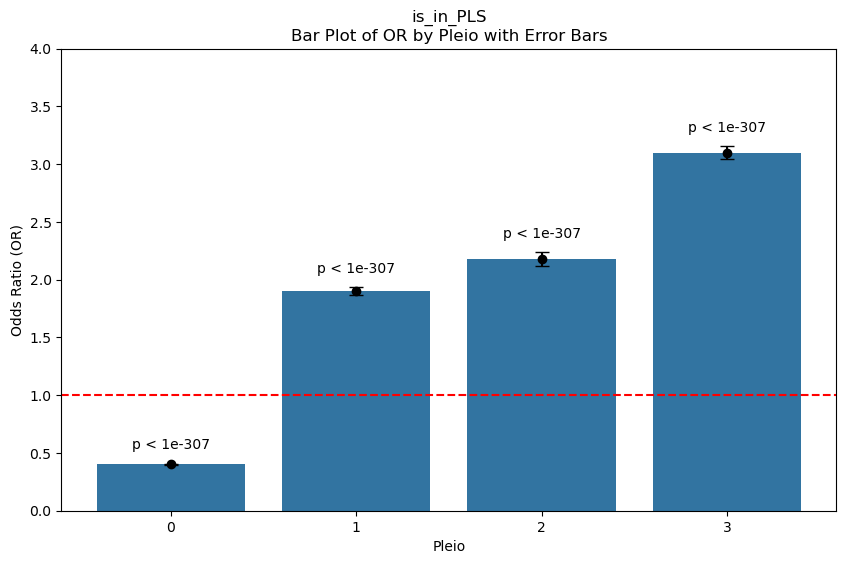

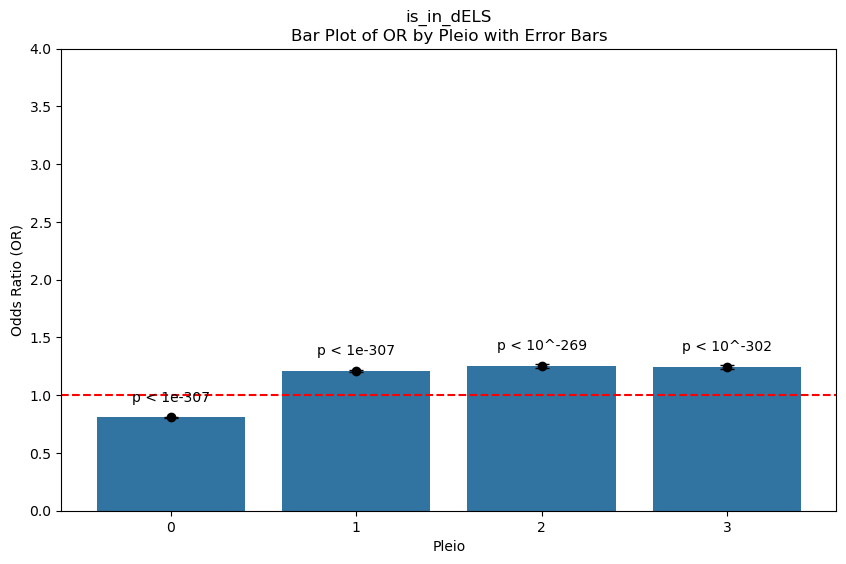

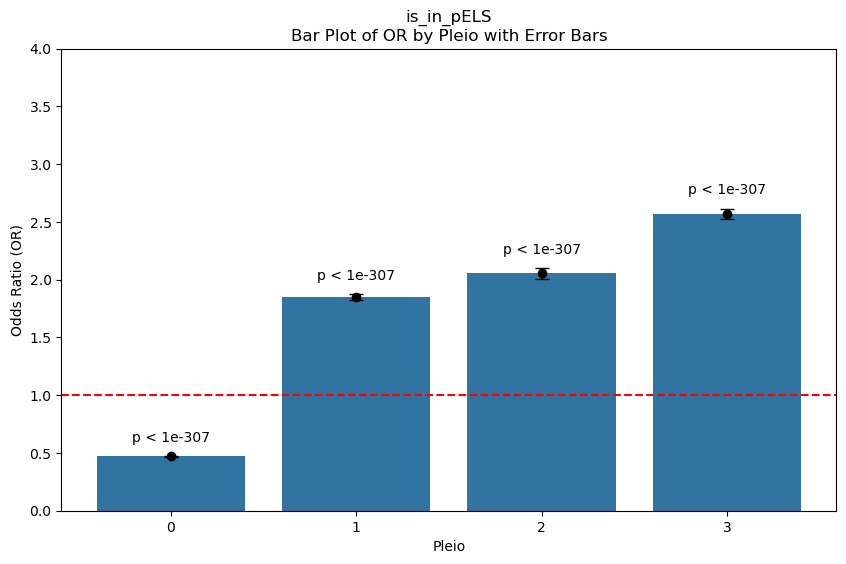

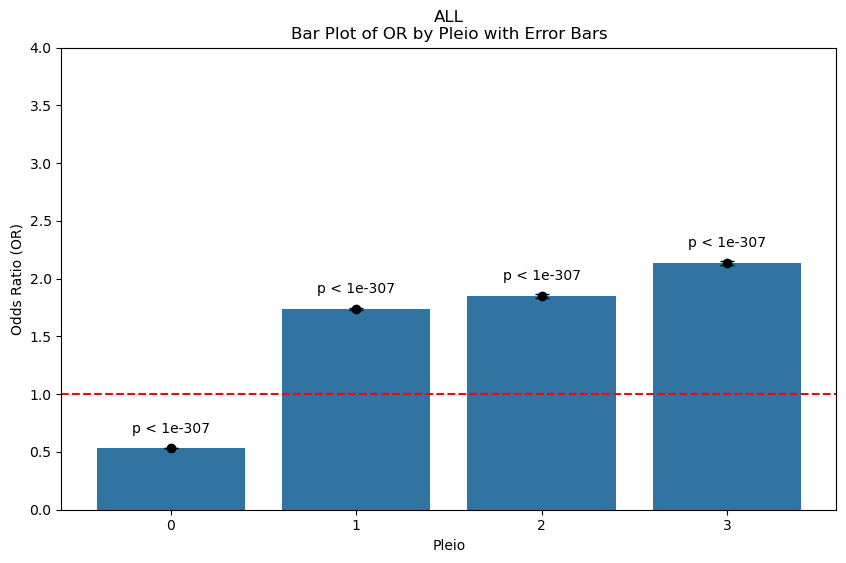

In [22]:
for region in GC.genome_regions:

    temp=df[df["region"]==region]
    
    orc.plot_or(df=temp,
                x='pleio',
                y='OR',
                xlabel='Pleio',
                ylim=4.0,
                title=f'{region}\nBar Plot of OR by Pleio with Error Bars')    